## 기본옵션

In [1]:
import sys, os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import pickle
import cv2

In [2]:
# 시스템 인코딩 확인용
sys.stdout.encoding

'UTF-8'

### 상용 한글 2350개의 음절과 유니코드

In [4]:
# 한국어 음절 유니코드는 AC00~D7A3
co = "0 1 2 3 4 5 6 7 8 9 A B C D E F"
start = "AC00"
end = "D7A3"

co = co.split(" ")
syllables = [a+b+c+d
            for a in co
            for b in co
            for c in co
            for d in co]

# syllables : 가능한 유니코드 전체 조합
syllables = np.array(syllables)

# 한글 음절 조합 생성 - hangul_syllables 11172개
ga = np.where(start == syllables)[0][0]
higt = np.where(end == syllables)[0][0]

hangul_uni = syllables[ga : higt+1]

print(hangul_uni)
print(len(hangul_uni))

['AC00' 'AC01' 'AC02' ... 'D7A1' 'D7A2' 'D7A3']
11172


In [5]:
# 16진수 유니코드 -> 한글 변환 (확인용, '가'만 프린트)
chars = chr(int(hangul_uni[0],16))
print(chars)

가


In [6]:
# 상용한글 2350 음절 
file = open('hangul.txt', 'r', encoding='utf-8')
using_hangul =list(file.read())
using_hangul[0].encode('utf-8')

# 상용 한글 2350개
len(using_hangul)

# 전체 한글 완성자 11172개의 유니코드
hangul_uni = hangul_uni.tolist()

# 전체 한글 완성자 11172개 한글
hangul = list(map(lambda x : chr(int(x, 16)), hangul_uni))


index = np.arange(len(hangul))
using_index = []
for i in range(len(using_hangul)):
    for j in range(len(hangul)):
        if using_hangul[i] in hangul[j]:
            using_index.append(j)
            
# 상용 2350개의 유니코드
using_uni = []
for i in range(len(using_index)):
    using_uni.append(hangul_uni[using_index[i]])

len(using_uni)

2350

## TTF-to-PNG
### Font List
- 바탕 : batang
- 돋움 : dotum
- 고딕 : gothic
- 명조 : myeongjo

In [8]:
def ttftopng(list):
    font_path = "fonts/"+list+"/"
    font_list=os.listdir("fonts/"+list+"/")
    
    # 폰트별 이미지 저장 
    num = np.arange(1,len(using_uni)+1,1).astype("str")

    for uni in range(len(num)):
        chars = chr(int(using_uni[uni], 16))
        path = "./png/"+list+"/"
        os.makedirs(path, exist_ok = True)
        for ttf in font_list:
            font = ImageFont.truetype(font = font_path + ttf, size = 56)
            x, y = font.getsize(chars)
        
            theImage = Image.new('RGB', (x + 4, y + 4), color='white')
            theDrawPad = ImageDraw.Draw(theImage)
            theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
            png_name = path + "/" + ttf[:-4] + "_" + num[uni]
            theImage.save('{}.png'.format(png_name))

In [1]:
def noise(list):
    images=[cv2.imread(file) for file in glob.glob("png/"+list+"_noise/*.png")]

    # 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
    img_16 =[]
    for i in range(len(images)):
        img_16.append(cv2.resize(images[i],(16,16)))
    img_16 = np.array(img_16)
    img_16 = img_16.astype('float32') / 255.0

    img_64 =[]
    for i in range(len(img_16)):
        img_64.append(cv2.resize(img_16[i], (64,64)))

    # 이미지 블러처리 - 커널사이즈 (5,5)
    list+ "{}".format("_noise") == []
    for i in range(len(img_64)):
        list+ "{}".format("_noise").append(cv2.blur(img_64[i], (5,5)))
        

In [2]:
def pngto_noisepkl(list):
    with open("pickle/"+list+"_noise.pkl",'wb') as a:
        pickle.dump(list+"_noise", a)

In [12]:
"noise_"+list[0]

'noise_batang'

In [ ]:
list = ['batang', 'dotum','gothic','myeongjo']
for i in range(len(list)):
    ttftopng(list[i])
    noise(list[i])
    pngto_noisepkl(list[i])

In [ ]:
# 이거 다 되면 합치기

### 1. batang  
1) ttf to png  
2) png to pickle

In [6]:
# 바탕 폰트 리스트 저장
font_path = "fonts/batang/"

font_list=os.listdir('fonts/batang/')
font_list

['batang.ttf',
 'gyeonggicheongnyeonBatangBold.ttf',
 'gyeonggicheongnyeonBatangRegular.ttf',
 'hamcholongBatangRegular.ttf',
 'HANBatangBold.ttf',
 'HANBatangExtra.ttf',
 'HANBatangExtraBBold.ttf',
 'HANBatangExtraBold.ttf',
 'IropkeBatangM.ttf',
 'UnBatang.ttf']

In [24]:
# 폰트별 이미지 저장 
num = np.arange(1,len(using_uni)+1,1).astype("str")

for uni in range(len(num)):
    chars = chr(int(using_uni[uni], 16))
    path = "./png/batang_noise/"
    os.makedirs(path, exist_ok = True)
    for ttf in font_list:
        font = ImageFont.truetype(font = font_path + ttf, size = 56)
        x, y = font.getsize(chars)
        
        theImage = Image.new('RGB', (x + 4, y + 4), color='white')
        theDrawPad = ImageDraw.Draw(theImage)
        theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
        png_name = path + "/" + ttf[:-4] + "_" + num[uni]
        
        theImage.save('{}.png'.format(png_name))

In [11]:
images=[cv2.imread(file) for file in glob.glob("png/batang/*.png")]

# 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
img_16 =[]
for i in range(len(images)):
    img_16.append(cv2.resize(images[i],(16,16)))
img_16 = np.array(img_16)
img_16 = img_16.astype('float32') / 255.0

img_64 =[]
for i in range(len(img_16)):
    img_64.append(cv2.resize(img_16[i], (64,64)))

# 이미지 블러처리 - 커널사이즈 (5,5)
batang_noise =[]
for i in range(len(img_64)):
    batang_noise.append(cv2.blur(img_64[i], (4,4)))

# 노이즈 넣은 이미지 확인
plt.imshow(cv2.blur(img_64[1423], (4,4)))

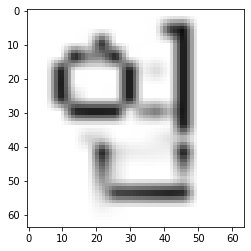

In [17]:
# 노이즈 넣은 이미지 확인
plt.imshow(cv2.blur(img_64[475], (1,1)))

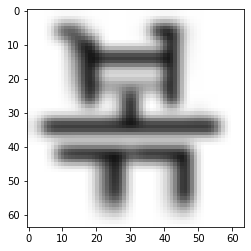

In [24]:
plt.imshow(cv2.blur(img_64[4663],(4,4)))

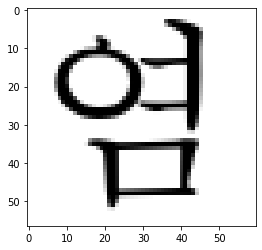

In [15]:
plt.imshow(images[475])

In [83]:
# 저장
with open('pickle/batang_noise.pkl','wb') as a:
    pickle.dump(batang_noise, a)

### 2. dotum  
1) ttf to png  
2) png to pickle

In [84]:
# 돋움 폰트 리스트 저장
font_path = "fonts/dotum/"

font_list=os.listdir('fonts/dotum/')
font_list

['Arita4.0B.ttf',
 'Arita4.0L.ttf',
 'Arita4.0M.ttf',
 'Arita4.0SB.ttf',
 'Arita4.0T.ttf',
 'dotum.ttf',
 'HANDotum.ttf',
 'HANDotumB.ttf',
 'HANDotumExt.ttf',
 'UnDotum.ttf']

In [85]:
# 폰트별 이미지 저장 
num = np.arange(1,len(using_uni)+1,1).astype("str")

for uni in range(len(num)):
    chars = chr(int(using_uni[uni], 16))
    path = "./png/dotum_noise/"
    os.makedirs(path, exist_ok = True)
    for ttf in font_list:
        font = ImageFont.truetype(font = font_path + ttf, size = 56)
        x, y = font.getsize(chars)
        
        theImage = Image.new('RGB', (x + 4, y + 4), color='white')
        theDrawPad = ImageDraw.Draw(theImage)
        theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
        png_name = path + "/" + ttf[:-4] + "_" + num[uni]
        
        theImage.save('{}.png'.format(png_name))

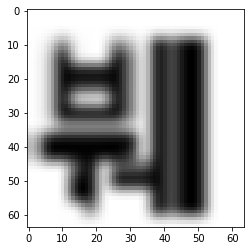

In [25]:
images=[cv2.imread(file) for file in glob.glob("png/dotum/*.png")]

# 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
img_16 =[]
for i in range(len(images)):
    img_16.append(cv2.resize(images[i],(16,16)))
img_16 = np.array(img_16)
img_16 = img_16.astype('float32') / 255.0

img_64 =[]
for i in range(len(img_16)):
    img_64.append(cv2.resize(img_16[i], (64,64)))

# 이미지 블러처리 - 커널사이즈 (4,4)
dotum_noise =[]
for i in range(len(img_64)):
    dotum_noise.append(cv2.blur(img_64[i], (4,4)))

# 노이즈 넣은 이미지 확인
plt.imshow(cv2.blur(img_64[5], (10,10)))

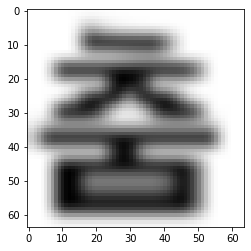

In [29]:
plt.imshow(cv2.blur(img_64[949],(5,5)))

In [87]:
# 저장 
with open('pickle/dotum_noise.pkl','wb') as a:
    pickle.dump(dotum_noise, a)

### 3. gothic  
1) ttf to png  
2) png to pickle

In [98]:
# 고딕 폰트 리스트 저장
font_path = "fonts/gothic/"

font_list=os.listdir('fonts/gothic/')
font_list

['HumanGothic.ttf',
 'KBIZhanmaumGothicBold.ttf',
 'KBIZhanmaumGothicLight.ttf',
 'malgun.ttf',
 'malgunbd.ttf',
 'malgunsl.ttf',
 'NanumBarunGothic-YetHangul.ttf',
 'NanumBarunGothic.ttf',
 'NanumBarunGothicBold.ttf',
 'NanumBarunGothicLight.ttf',
 'NanumGothic.ttf',
 'NanumGothicBold.ttf',
 'NanumGothicLight.ttf',
 'YunGothic320.ttf',
 'YunGothic340.ttf']

In [99]:
# 폰트별 이미지 저장 
num = np.arange(1,len(using_uni)+1,1).astype("str")

for uni in range(len(num)):
    chars = chr(int(using_uni[uni], 16))
    path = "./png/gothic_noise/"
    os.makedirs(path, exist_ok = True)
    for ttf in font_list:
        font = ImageFont.truetype(font = font_path + ttf, size = 56)
        x, y = font.getsize(chars)
        
        theImage = Image.new('RGB', (x + 4, y + 4), color='white')
        theDrawPad = ImageDraw.Draw(theImage)
        theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
        png_name = path + "/" + ttf[:-4] + "_" + num[uni]
        
        theImage.save('{}.png'.format(png_name))

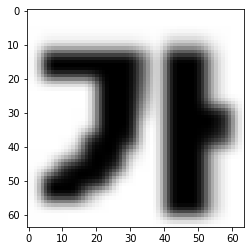

In [30]:
images=[cv2.imread(file) for file in glob.glob("png/gothic/*.png")]

# 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
img_16 =[]
for i in range(len(images)):
    img_16.append(cv2.resize(images[i],(16,16)))
img_16 = np.array(img_16)
img_16 = img_16.astype('float32') / 255.0

img_64 =[]
for i in range(len(img_16)):
    img_64.append(cv2.resize(img_16[i], (64,64)))

# 이미지 블러처리 - 커널사이즈 (5,5)
gothic_noise =[]
for i in range(len(img_64)):
    gothic_noise.append(cv2.blur(img_64[i], (4,4)))

# 노이즈 넣은 이미지 확인
plt.imshow(cv2.blur(img_64[0], (4,4)))

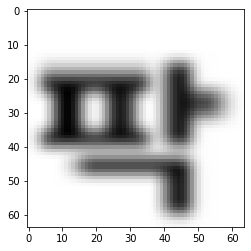

In [34]:
plt.imshow(cv2.blur(img_64[5930],(5,5)))

In [101]:
# 저장
with open('pickle/gothic_noise.pkl','wb') as a:
    pickle.dump(gothic_noise, a)

### 4. myeongjo  
1) ttf to png  
2) png to pickle

In [102]:
# 명조 폰트 리스트 저장
font_path = "fonts/myeongjo/"

font_list=os.listdir('fonts/myeongjo/')
font_list

['ChosunIlboMyeongjo.ttf',
 'HumanMyeongjo.ttf',
 'KBIZhanmaumMyeongjoBold.ttf',
 'KBIZhanmaumMyeongjoLight.ttf',
 'KBIZhanmaumMyeongjoMedium.ttf',
 'KBIZhanmaumMyeongjoRegular.ttf',
 'NanumMyeongjo-YetHangul.ttf',
 'NanumMyeongjo.ttf',
 'NanumMyeongjoBold.ttf',
 'NanumMyeongjoEcoR.ttf',
 'NanumMyeongjoExtraBold.ttf']

In [103]:
# 폰트별 이미지 저장 
num = np.arange(1,len(using_uni)+1,1).astype("str")

for uni in range(len(num)):
    chars = chr(int(using_uni[uni], 16))
    path = "./png/myeongjo_noise/"
    os.makedirs(path, exist_ok = True)
    for ttf in font_list:
        font = ImageFont.truetype(font = font_path + ttf, size = 56)
        x, y = font.getsize(chars)
        
        theImage = Image.new('RGB', (x + 4, y + 4), color='white')
        theDrawPad = ImageDraw.Draw(theImage)
        theDrawPad.text((0.0, 0.0), chars[0], font=font, fill='black')
        
        png_name = path + "/" + ttf[:-4] + "_" + num[uni]
        
        theImage.save('{}.png'.format(png_name))

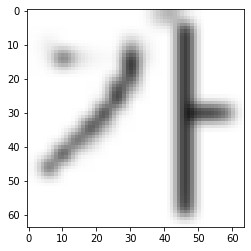

In [35]:
images=[cv2.imread(file) for file in glob.glob("png/myeongjo/*.png")]

# 이미지 전처리 : (16,16) -> 정규화 -> (64,64)
img_16 =[]
for i in range(len(images)):
    img_16.append(cv2.resize(images[i],(16,16)))
img_16 = np.array(img_16)
img_16 = img_16.astype('float32') / 255.0

img_64 =[]
for i in range(len(img_16)):
    img_64.append(cv2.resize(img_16[i], (64,64)))

# 이미지 블러처리 - 커널사이즈 (5,5)
myeongjo_noise =[]
for i in range(len(img_64)):
    myeongjo_noise.append(cv2.blur(img_64[i], (4,4)))

# 노이즈 넣은 이미지 확인
plt.imshow(cv2.blur(img_64[0], (4,4)))

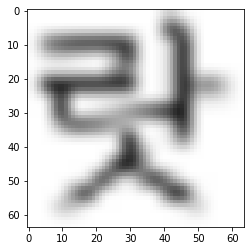

In [36]:
plt.imshow(cv2.blur(img_64[6666],(5,5)))

In [105]:
with open('pickle/myeongjo_noise.pkl','wb') as a:
    pickle.dump(myeongjo_noise, a)